# Pandas 3
### Benj McMullin
### Math 403
### 9/19/2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [3]:
def prob1():
    """
    Use a groupby object to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    # Load college data
    college = pd.read_csv('college.csv')

    # Get public and private groups
    pub = college.groupby("Private").get_group("No")
    priv = college.groupby("Private").get_group("Yes")

    # Get student to faculty ratio data
    ratio = [pub["S.F.Ratio"], priv["S.F.Ratio"]]
    ind_ratio = np.argmax([ratio[0].mean(), ratio[1].mean()])

    # Get top ten percent data
    top_ten = [pub["Top10perc"], priv["Top10perc"]]
    ind_ten = np.argmax([top_ten[0].mean(), top_ten[1].mean()])

    # Get top twenty five percent data
    twenty_five = [pub["Top25perc"], priv["Top25perc"]]
    ind_twenty = np.argmax([twenty_five[0].mean(), twenty_five[1].mean()])

    return ratio[ind_ratio].describe().to_numpy(), top_ten[ind_ten].describe().to_numpy(), twenty_five[ind_twenty].describe().to_numpy()


prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

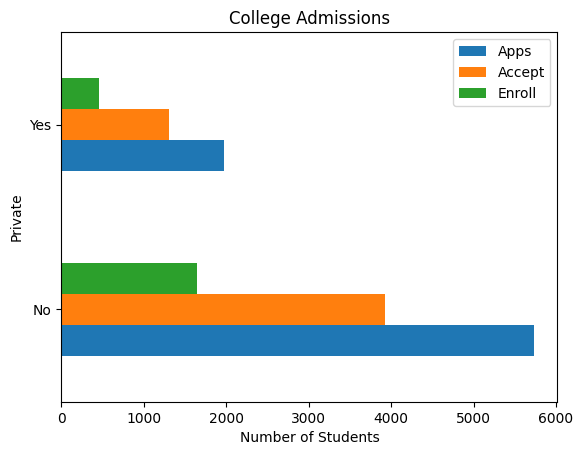

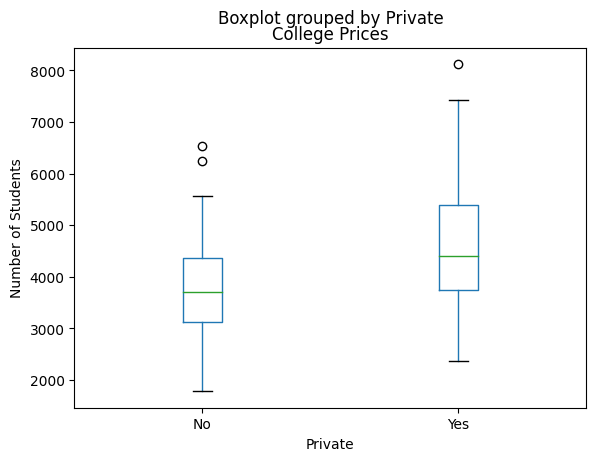

In [4]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    # Load college data
    college = pd.read_csv('college.csv')

    # Get public and private groups
    # public = college.groupby("Private").get_group("No")
    priv = college.groupby("Private")

    priv[["Apps", "Accept", "Enroll"]].mean().plot(kind="barh", title="College Admissions")
    plt.xlabel("Number of Students")

    college.boxplot(["Room.Board"], by="Private", grid=False)
    plt.title("College Prices")
    plt.ylabel("Number of Students")

prob2()

# Problem 3

In [5]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination has the highest Usual Weekly 
            Earnings in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week 
            per person?
    Note: Hard coding is okay as long as there is code that makes sense for each problem.
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    # Read in Ohio data
    ohio = pd.read_csv('Ohio_1999.csv')

    # Most money in total
    q1 = ohio.pivot_table(values="Usual Weekly Earnings", index="Race", columns="Sex", aggfunc="max")

    # Worked the least amount
    q2 = ohio.pivot_table(values="Usual Hours Worked", index="Race", columns="Sex", aggfunc="sum")

    # Highest average hours
    q3 = ohio.pivot_table(values="Usual Hours Worked", index="Race", columns="Sex", aggfunc="mean")

    # Return a tuple of tuples of indexes for the questions asked
    return q1.stack().idxmax(), q2.stack().idxmin(), q3.stack().idxmax(), 


prob3()

((1, 1), (3, 2), (3, 1))

# Problem 4

In [6]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    # Load Ohio data
    ohio = pd.read_csv('Ohio_1999.csv')

    # Find most common education
    degree = pd.cut(ohio["Educational Attainment"],  [0, 38, 42, 47])
    pt1 = degree.value_counts().idxmax()

    # Find the hardest working age
    age = pd.qcut(ohio["Age"],  6)
    pt2 = ohio.pivot_table(values="Usual Hours Worked", index=age, aggfunc="mean", fill_value='-')
    pt2 = pt2.stack().idxmax()[0]
    
    # Find lowest salary
    find_low = ohio.pivot_table(values="Yearly Salary", index=age, columns=degree, aggfunc='mean')
    pt3 = find_low.stack().idxmin()
    
    return pt1, pt2, pt3


prob4()

(Interval(38, 42, closed='right'),
 Interval(40.0, 46.0, closed='right'),
 (Interval(15.999, 29.0, closed='right'), Interval(0, 38, closed='right')))

# Problem 5

In [7]:
def prob5():
    """
    Use College.csv to answer the following questions:
        1. Is there a partition in which the number of both 
           private and public universities does not increase 
           as the percentage of alumni that donates increases?
        2. Is the partition with the greatest number of schools 
           the same for private and public universities?
        3. Is it true that the partition that has the least 
           number of students from the top 10 percent of their 
           high school class that were admitted on average is 
           the same for both private and public universities?
        4. The average percentage of students admitted from the 
           top 10 percent of their high school class is very high
           in private universities with very low acceptance rates. 
           Why is this not a good conclusion to draw solely from 
           this dataset? Use only the data to explain why; do not 
           extrapolate.

    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    # load data
    college = pd.read_csv('college.csv')
    type_group = college.groupby("Private")
    pub = type_group.get_group("No")
    priv = type_group.get_group("Yes")

    # part one NEW
    college["alumni_partition"] = pd.cut(college["perc.alumni"], [0, 20, 40, 60, 80, 100])
    grouped = college.groupby(["alumni_partition", "Private"])
    # print("Part one")
    # print(grouped.size().unstack())

    # part two
    grad_pub = pd.qcut(pub["Grad.Rate"], 5)
    grad_pri = pd.qcut(priv["Grad.Rate"], 5)
    graduation = grad_pri.value_counts().idxmax() == grad_pub.value_counts().idxmax()
    # print("\nPart two:")
    # print(graduation)

    # part three NEW
    college["Acceptance.Rate"] = college["Accept"] / college["Apps"]
    college["Acceptance.Rate.Part"] = pd.cut(college["Acceptance.Rate"], [0, 0.25, 0.5, 0.75, 1])
    grouped = college.groupby(["Acceptance.Rate.Part", "Private"])
    least_admitted = grouped["Top10perc"].mean().unstack().idxmin()
    # print("\nPart three:")
    # print(least_admitted)

    # part four
    acceptance = pd.qcut(college["Acceptance.Rate"], 4)
    explanation = "Private colleges have more students from the top 10% of their high school class, so even though they have low acceptance rates they can select more of these students."
    # print("\nPart Four")
    # print(college.pivot_table(values="Top10perc", index="Private", columns=acceptance, aggfunc="count"))

    return False, graduation, True, explanation

prob5()

C:\Users\benja\AppData\Local\Temp\ipykernel_17116\2698277302.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = college.groupby(["alumni_partition", "Private"])
C:\Users\benja\AppData\Local\Temp\ipykernel_17116\2698277302.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = college.groupby(["Acceptance.Rate.Part", "Private"])


(False,
 False,
 True,
 'Private colleges have more students from the top 10% of their high school class, so even though they have low acceptance rates they can select more of these students.')